In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os , json

In [10]:
!pip install -q kaggle

os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

kaggle_token = {
    "username": "YOUR_KAGGLE_USERNAME",
    "key": "YOUR_KAGGLE_API_KEY"
}

with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_token, f)

os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

!kaggle datasets download -d andrewmvd/fetal-health-classification -p data --force
!unzip -o data/fetal-health-classification.zip -d data/

df = pd.read_csv("data/fetal_health.csv")
print("✅ Dataset loaded successfully!")
print(df.shape)
df.head()


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
License(s): other
  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 135MB/s]
Archive:  data/fetal-health-classification.zip
  inflating: data/fetal_health.csv   
✅ Dataset loaded successfully!
(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [12]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [13]:
X = df.drop('fetal_health', axis= 1)
Y = df['fetal_health']

In [14]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print('--- Data Split ---')
print('Training set:', X_train.shape)
print('Validation set:', X_val.shape)
print('Test set:', X_test.shape)

--- Data Split ---
Training set: (1360, 21)
Validation set: (340, 21)
Test set: (426, 21)


In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

print("=== Deep Neural Network (MLP) Training Summary ===\n")
print("Model Architecture:")
print("- Input features:", X_train_scaled.shape[1])
print("- Hidden layers: (64, 32)")
print("- Activation: ReLU")
print("- Optimizer: Adam")
print("- Early Stopping: Enabled (validation_fraction=0.1)\n")

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=True
)

print("Training the MLP model...\n")
mlp.fit(X_train_scaled, y_train)

y_val_pred = mlp.predict(X_val_scaled)
val_acc = accuracy_score(y_val, y_val_pred)

print("\n=== Validation Results ===")
print(f"Validation Accuracy: {val_acc:.4f}")


=== Deep Neural Network (MLP) Training Summary ===

Model Architecture:
- Input features: 21
- Hidden layers: (64, 32)
- Activation: ReLU
- Optimizer: Adam
- Early Stopping: Enabled (validation_fraction=0.1)

Training the MLP model...

Iteration 1, loss = 1.18417396
Validation score: 0.544118
Iteration 2, loss = 0.92612821
Validation score: 0.757353
Iteration 3, loss = 0.76777594
Validation score: 0.772059
Iteration 4, loss = 0.66554297
Validation score: 0.772059
Iteration 5, loss = 0.59068851
Validation score: 0.772059
Iteration 6, loss = 0.52761097
Validation score: 0.779412
Iteration 7, loss = 0.47693270
Validation score: 0.794118
Iteration 8, loss = 0.43638685
Validation score: 0.852941
Iteration 9, loss = 0.40504406
Validation score: 0.860294
Iteration 10, loss = 0.37869248
Validation score: 0.860294
Iteration 11, loss = 0.35620981
Validation score: 0.860294
Iteration 12, loss = 0.33784483
Validation score: 0.860294
Iteration 13, loss = 0.32348387
Validation score: 0.867647
Iterat


Detailed Classification Report:
              precision    recall  f1-score   support

      Normal       0.92      0.98      0.95       265
     Suspect       0.74      0.60      0.66        47
Pathological       0.89      0.61      0.72        28

    accuracy                           0.90       340
   macro avg       0.85      0.73      0.78       340
weighted avg       0.89      0.90      0.89       340



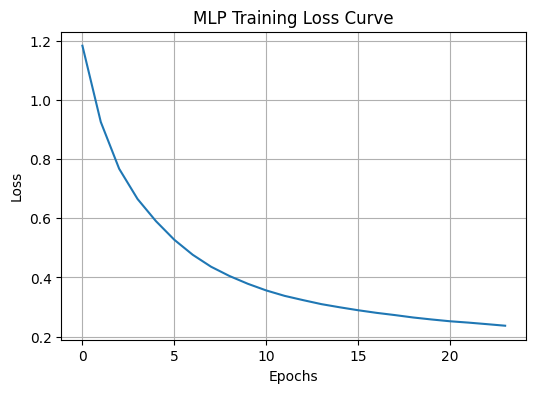

In [16]:
print("\nDetailed Classification Report:")
print(classification_report(y_val, y_val_pred,
                            target_names=['Normal', 'Suspect', 'Pathological']))


plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()



In [17]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("\n=== Overall Model Performance on Test Set (Before Saving) ===")

X_test_scaled = scaler.transform(X_test)
y_test_pred = mlp.predict(X_test_scaled)

test_acc = accuracy_score(y_test, y_test_pred)
print(f"✅ Test Accuracy: {test_acc:.4f}")

print("\n=== Classification Report ===")
print(classification_report(
    y_test,
    y_test_pred,
    target_names=['Normal', 'Suspect', 'Pathological']
))




=== Overall Model Performance on Test Set (Before Saving) ===
✅ Test Accuracy: 0.8709

=== Classification Report ===
              precision    recall  f1-score   support

      Normal       0.91      0.97      0.94       332
     Suspect       0.62      0.53      0.57        59
Pathological       0.75      0.51      0.61        35

    accuracy                           0.87       426
   macro avg       0.76      0.67      0.71       426
weighted avg       0.86      0.87      0.86       426



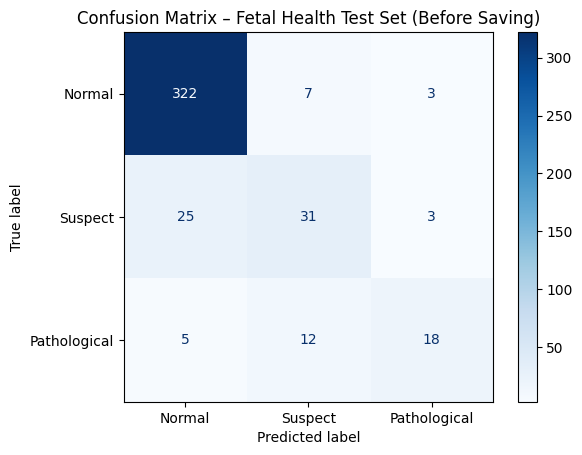

In [18]:

ConfusionMatrixDisplay.from_estimator(
    mlp,
    X_test_scaled,
    y_test,
    display_labels=['Normal', 'Suspect', 'Pathological'],
    cmap='Blues'
)
plt.title("Confusion Matrix – Fetal Health Test Set (Before Saving)")
plt.show()

In [19]:
import joblib
import os

os.makedirs("saved_models", exist_ok=True)

joblib.dump(mlp, "saved_models/mlp_fetal_health.joblib")
joblib.dump(scaler, "saved_models/scaler_fetal_health.joblib")

print(" Scikit-learn model and scaler saved successfully.")
print("Files:")
print("- saved_models/mlp_fetal_health.joblib")
print("- saved_models/scaler_fetal_health.joblib\n")

 Scikit-learn model and scaler saved successfully.
Files:
- saved_models/mlp_fetal_health.joblib
- saved_models/scaler_fetal_health.joblib



In [20]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("=== Model Reload and Inference Demo ===\n")\

print("Loading Scikit-learn model and scaler...")
mlp_loaded = joblib.load("saved_models/mlp_fetal_health.joblib")
scaler_loaded = joblib.load("saved_models/scaler_fetal_health.joblib")
print(" Scikit-learn model successfully loaded.\n")


=== Model Reload and Inference Demo ===

Loading Scikit-learn model and scaler...
 Scikit-learn model successfully loaded.



In [21]:
n_samples = 5
sample_indices = np.random.choice(len(X_test), n_samples, replace=False)
X_sample = X_test.iloc[sample_indices]
y_true_sample = y_test.iloc[sample_indices].values

X_sample_scaled = scaler_loaded.transform(X_sample)

y_pred_sklearn = mlp_loaded.predict(X_sample_scaled)

In [22]:

print("=== Inference Results on Random Test Samples ===\n")
df_results = pd.DataFrame({
    "True Label": y_true_sample,
    "Scikit-learn Prediction": y_pred_sklearn,
})
df_results.index = [f"Sample {i+1}" for i in range(len(df_results))]
print(df_results)  # Print comparison table
print("\nNote: 1 = Normal, 2 = Suspect, 3 = Pathological\n")

=== Inference Results on Random Test Samples ===

          True Label  Scikit-learn Prediction
Sample 1         1.0                      1.0
Sample 2         3.0                      1.0
Sample 3         1.0                      1.0
Sample 4         1.0                      1.0
Sample 5         2.0                      2.0

Note: 1 = Normal, 2 = Suspect, 3 = Pathological



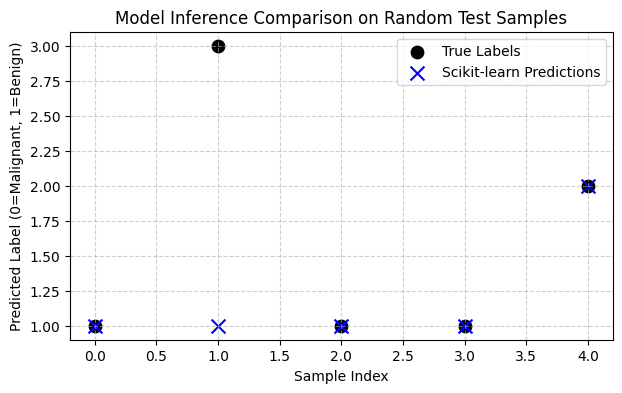

 Inference complete! The plot and table above show how both models perform on unseen data.


In [23]:
plt.figure(figsize=(7, 4))
x = np.arange(n_samples)
plt.scatter(x, y_true_sample, color="black", label="True Labels", marker='o', s=80)
plt.scatter(x, y_pred_sklearn, color="blue", label="Scikit-learn Predictions", marker='x', s=100)

plt.title("Model Inference Comparison on Random Test Samples")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Label (0=Malignant, 1=Benign)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(" Inference complete! The plot and table above show how both models perform on unseen data.")